In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
import seaborn as sns 
from xgboost import XGBRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 




In [1]:
!pip install xgboost

In [3]:
dataset = datasets.load_boston()

In [4]:
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [5]:
print(dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [6]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [7]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
house_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [9]:
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
house_df['Price'] = dataset.target

In [12]:
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
house_df.shape

(506, 14)

In [14]:
house_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


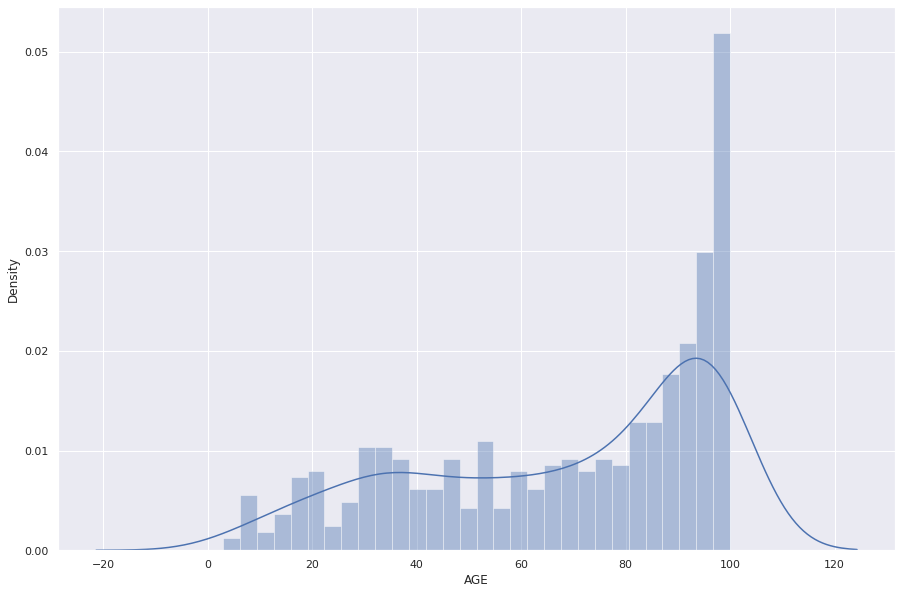

In [15]:
sns.set(rc = {'figure.figsize': (15, 10)})
sns.distplot(house_df['AGE'], bins=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


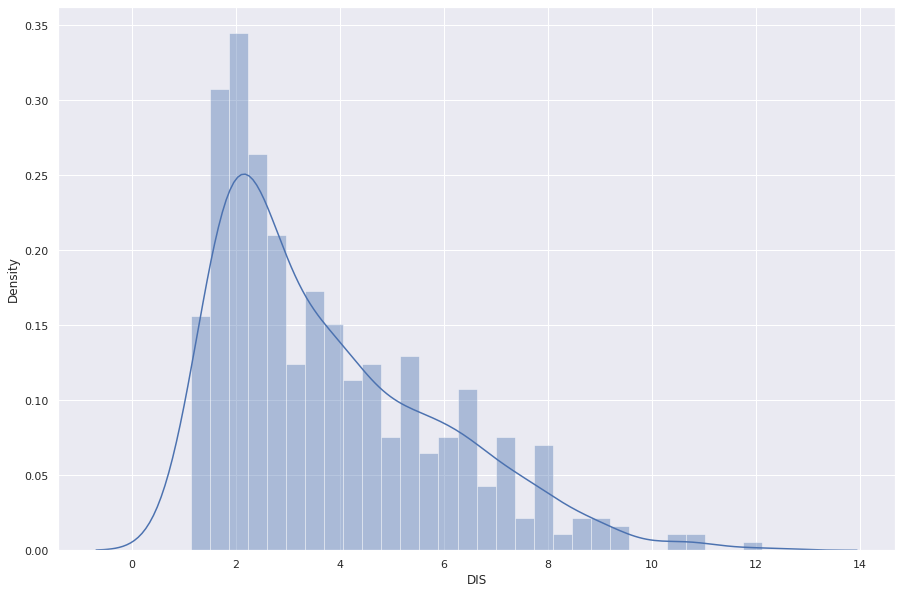

In [16]:
sns.set(rc = {'figure.figsize': (15, 10)})
sns.distplot(house_df['DIS'], bins=30)
plt.show()

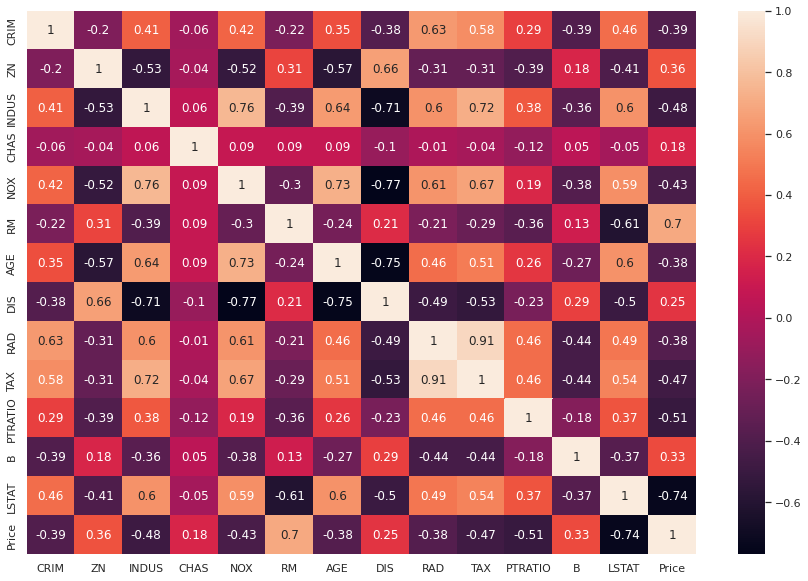

In [17]:
correlation_matrix = house_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot= True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


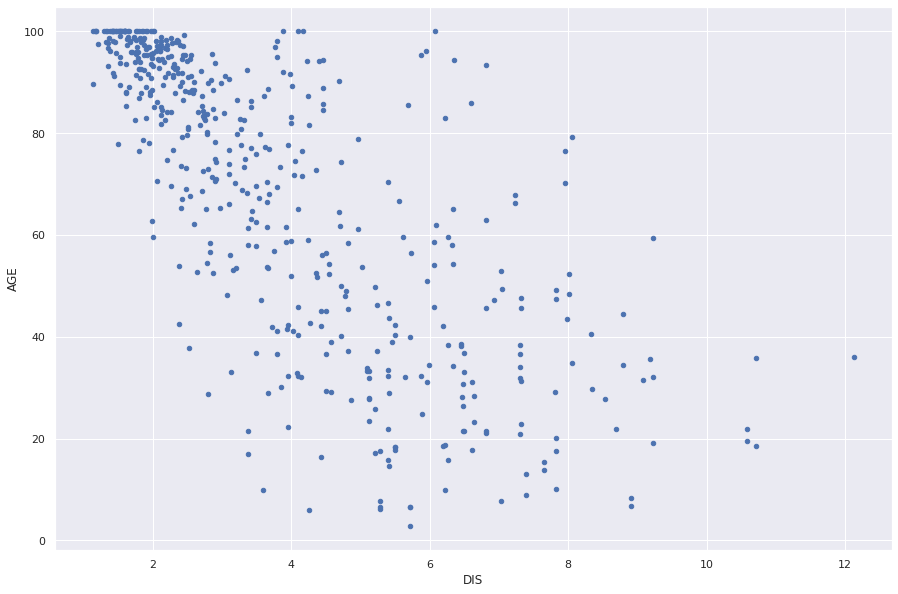

In [18]:
house_df.plot.scatter(x='DIS', y='AGE')

In [19]:
x = dataset.data
y = dataset.target
print(x.shape, y.shape)

(506, 13) (506,)


In [20]:
house_df.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'], dtype=object)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state= 42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [22]:
train_x = preprocessing.normalize(X_train)
test_x = preprocessing.normalize(X_test)

In [23]:
train_x[0:5]

array([[1.97719051e-02, 0.00000000e+00, 2.38209381e-02, 0.00000000e+00,
        8.08069392e-04, 6.98045612e-03, 1.28053993e-01, 2.76467650e-03,
        3.15857743e-02, 8.76505236e-01, 2.65846934e-02, 4.59941516e-01,
        3.27834016e-02],
       [1.24337732e-03, 0.00000000e+00, 1.61320572e-02, 0.00000000e+00,
        1.06622197e-03, 1.15619683e-02, 1.11973125e-01, 8.91543891e-03,
        7.92730086e-03, 6.08420341e-01, 4.16183295e-02, 7.84049691e-01,
        1.67860596e-02],
       [7.29281484e-05, 7.36435428e-02, 1.27508534e-02, 0.00000000e+00,
        9.21385926e-04, 1.26898345e-02, 4.90255585e-02, 1.39727050e-02,
        2.10410122e-03, 6.39646772e-01, 3.55593107e-02, 7.62210668e-01,
        1.64751126e-02],
       [1.04781794e-02, 0.00000000e+00, 2.68998226e-02, 0.00000000e+00,
        9.12513318e-04, 9.07014459e-03, 1.26473751e-01, 3.00475477e-03,
        3.56682730e-02, 9.89794576e-01, 3.00207965e-02, 3.74516867e-03,
        3.46130866e-02],
       [1.44405380e-03, 0.00000000e+

In [24]:
model = XGBRegressor()
model.fit(train_x, Y_train)

[06:34:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
network = tf.keras.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(13,)))
network.add(layers.Dropout(0.2))
network.add(layers.Dense(64, activation='relu'))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))

In [ ]:
network.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss='mse', metrics=['mae'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
print(network.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = network.fit(train_x, Y_train, epochs= 100, validation_data = (test_x, Y_test), batch_size= 1)

Epoch 1/100
404/404 [==============================] - 1s 2ms/step - loss: 93.3973 - mae: 7.1086 - val_loss: 44.8448 - val_mae: 5.2520
Epoch 2/100
404/404 [==============================] - 1s 2ms/step - loss: 74.7585 - mae: 6.1045 - val_loss: 42.9675 - val_mae: 5.1230
Epoch 3/100
404/404 [==============================] - 1s 2ms/step - loss: 73.0530 - mae: 6.1065 - val_loss: 37.5914 - val_mae: 4.1644
Epoch 4/100
404/404 [==============================] - 1s 2ms/step - loss: 64.9728 - mae: 5.7308 - val_loss: 78.5593 - val_mae: 6.3714
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 62.1855 - mae: 5.5111 - val_loss: 30.2508 - val_mae: 3.6581
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 54.4786 - mae: 5.3586 - val_loss: 29.6922 - val_mae: 4.0195
Epoch 7/100
404/404 [==============================] - 1s 2ms/step - loss: 52.8088 - mae: 5.1529 - val_loss: 38.5331 - val_mae: 4.0854
Epoch 8/100
404/404 [==============================] - 

In [25]:
pred_y = model.predict(np.reshape(test_x[0], (-1, 13)))

In [26]:
pred_y

array([24.851973], dtype=float32)

In [28]:
print(y[0])

24.0


In [30]:
vals = []
for i in range(0, Y_train.__len__()):
  val= model.predict(np.reshape(train_x[i], (-1, 13)))
  vals.append(val[0])

In [31]:
print(vals.__len__())

404


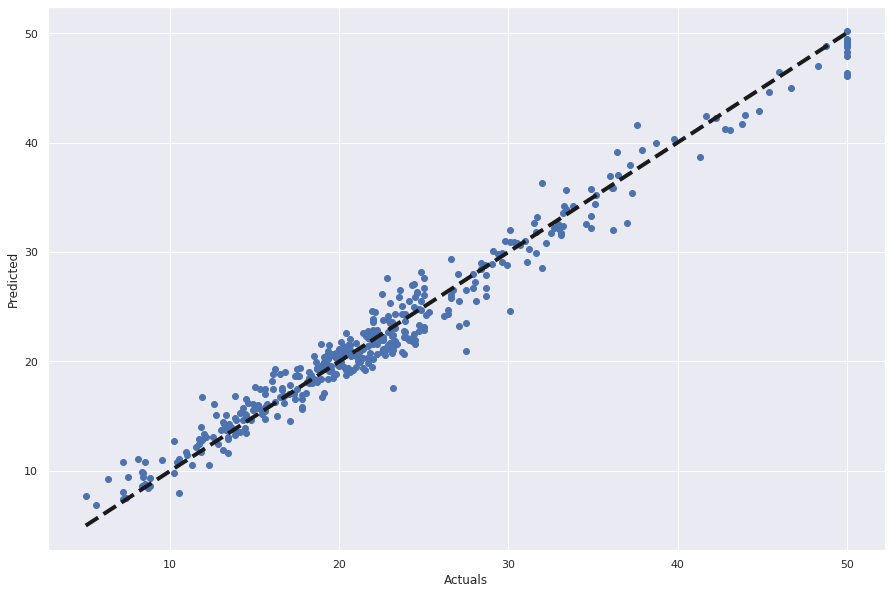

In [32]:
fig, ax = plt.subplots()
ax.scatter(Y_train, vals)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actuals')
ax.set_ylabel('Predicted')
plt.show()